# DATASET: Sleep Health and Lifestyle Dataset
 
The Sleep Health and Lifestyle Dataset include a wide range of features related to daily routines and sleep. Dataset include gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders of 400 individuals.  

Source: https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset 

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset

data = pd.read_csv(r"C:\Users\gowri\Downloads\archive (1)\Sleep_health_and_lifestyle_dataset.csv")
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Features: age,Sleep Duration,quality of Sleep,Physical Activity Level,Daily Steps,heart rate

Label: Stress level

# Data Pre-processing

In [3]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [4]:
# Check qualitative columns for duplication of unique categories
a = data['Occupation'].unique()
a

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

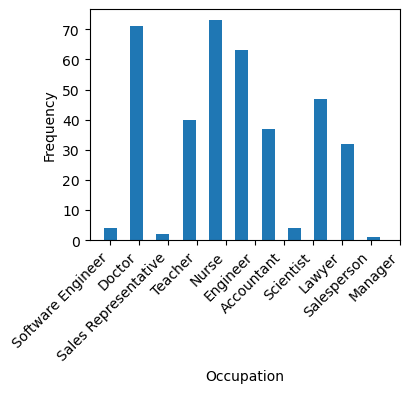

In [5]:
plt.figure(figsize=(4, 3)) 
plt.hist(data['Occupation'], bins=len(a), align='left', rwidth=0.5) # rwidth is an optional parameter that sets the relative width of bars in a histogram.
plt.xticks(range(len(a)), a, rotation=45, ha='right')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

The dataset has majority of participation from doctors, nurses and engineers when compared to the rest.

In [6]:
data['Gender'].unique() 

array(['Male', 'Female'], dtype=object)

In [7]:
data['Gender'].value_counts()

Gender
Male      189
Female    185
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

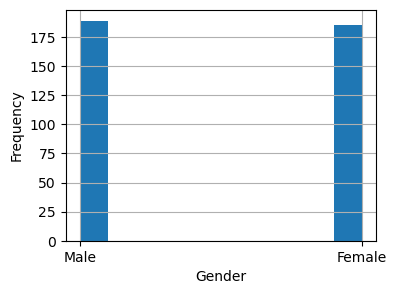

In [8]:
plt.figure(figsize=(4, 3)) 
data['Gender'].hist()
plt.xlabel('Gender')
plt.ylabel('Frequency')

The participation of both males and females in the data is equal.

In [9]:
data['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

BMI Category has Normal and normal weight which could be merged into one

In [10]:
# Replace'Normal' as 'Normal Weight' to avoid confusion
data['BMI Category']=data['BMI Category'].replace('Normal','Normal Weight')
data['BMI Category'].unique()

array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

Text(0, 0.5, 'Frequency')

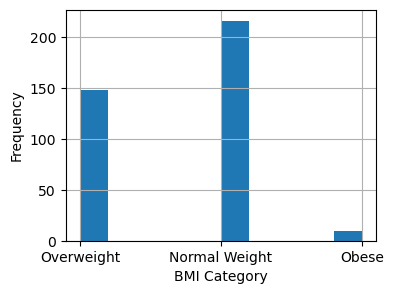

In [11]:
plt.figure(figsize=(4, 3)) 
data['BMI Category'].hist()
plt.xlabel('BMI Category')
plt.ylabel('Frequency')

Majority of individuals belong to normal weight category.

In [12]:
data.dtypes 

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [14]:
data['Sleep Disorder'].isna().sum()

219

Sleep disorder has 219 nulls

In [15]:
# Check for categories in 'Sleep Disorder' column
data['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [16]:
#  Fill nulls in Sleep disorder as None
data['Sleep Disorder']=data['Sleep Disorder'].replace(np.NaN,'None')
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [17]:
# Drop Person ID as its not relevant
data1=data.drop(columns='Person ID', axis=1)
data1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [18]:
# Label encoding categorical variables (using get_dummies handy tool)
from sklearn.preprocessing import LabelEncoder

df = pd.DataFrame(data, columns=['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])
# Initialize LabelEncoder
le = LabelEncoder()

# Encode each column separately
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Display the encoded DataFrame
display(df.head())

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
0,1,9,2,11,1
1,1,1,0,9,1
2,1,1,0,9,1
3,1,6,1,22,2
4,1,6,1,22,2


In [19]:
data1.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal Weight,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [20]:
data1.drop(columns=['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'],axis=1, inplace=True)

In [21]:
# Merge both encoded and original datasets
data2 = pd.concat([df,data1],axis=1)
data2.head()

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,9,2,11,1,27,6.1,6,42,6,77,4200
1,1,1,0,9,1,28,6.2,6,60,8,75,10000
2,1,1,0,9,1,28,6.2,6,60,8,75,10000
3,1,6,1,22,2,28,5.9,4,30,8,85,3000
4,1,6,1,22,2,28,5.9,4,30,8,85,3000


In [22]:
data2.dtypes

Gender                       int32
Occupation                   int32
BMI Category                 int32
Blood Pressure               int32
Sleep Disorder               int32
Age                          int64
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
Heart Rate                   int64
Daily Steps                  int64
dtype: object

# EDA

Explore data distribution:  

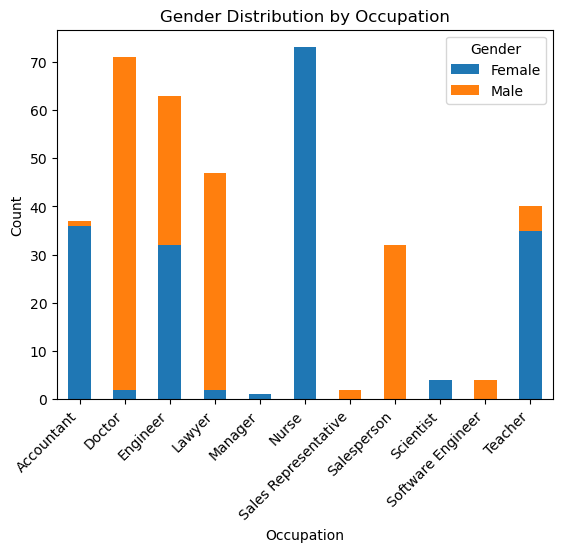

In [23]:
# Group the data by 'Occupation' and 'Gender' and count the occurrences
og = data.groupby(['Occupation', 'Gender']).size().unstack()

# Plot the bar plot
og.plot(kind='bar', stacked=True)
plt.title('Gender Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability, ha='right' aligns names with xticks correctly
plt.legend(title='Gender')
plt.show()

The stacked bar plot provides a snapshot of the gender distribution in a variety of occupations: 

    The most common occupations for women are nurses, teachers, and accountants.   
    The most common occupations for men are doctors, lawyers, engineers, managers, and salesperson.  
    Overall, the graph shows that there is a significant gender gap in many occupations.    
    For example, there are comparitively more men who are doctors, lawyers, salespersons,software engineer.   
    However, there are also some occupations in which there are more women than men, such as nurses, teachers, and accountants. 
    Engineers have almost equal distribution of men and women.

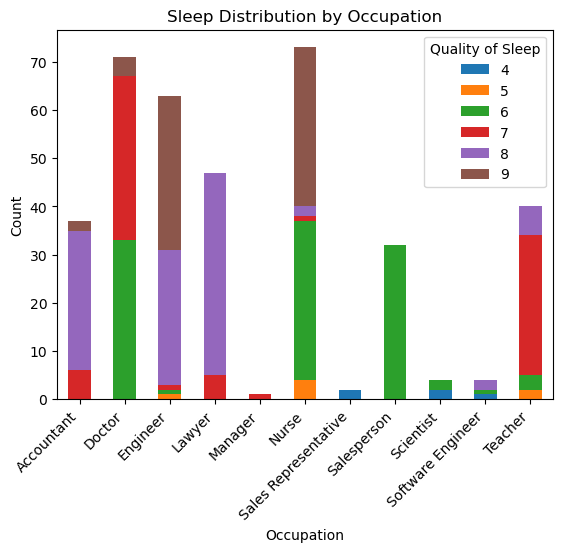

In [24]:
# Group the data by 'Occupation' and 'Quality of Sleep' and count the occurrences

os = data.groupby(['Occupation', 'Quality of Sleep']).size().unstack()

# Plot the bar plot
os.plot(kind='bar', stacked=True)
plt.title('Sleep Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability, ha='right' aligns names with xticks correctly
plt.legend(title='Quality of Sleep')
plt.show()

Occupations with the most people reporting good sleep: Doctors, Lawyers, and Scientists.  
Occupations with the most people reporting fair sleep: Accountants, Nurses, and Sales Representatives.  
Occupations with the most people reporting poor sleep: Engineers, Managers, and Software Engineers.  

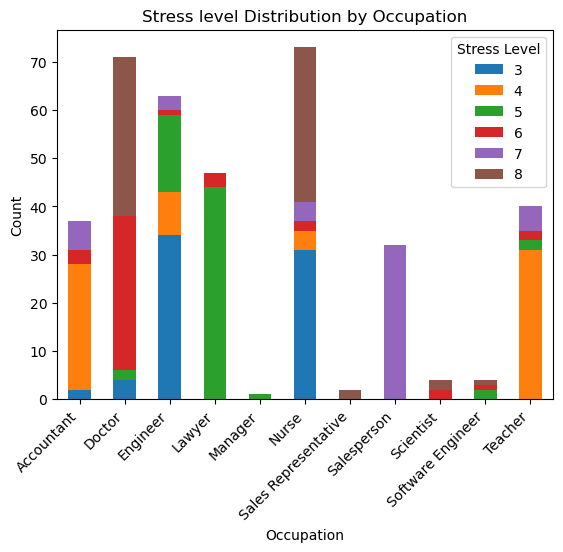

In [25]:
# Group the data by 'Occupation' and 'Stress Level' and count the occurrences

ostr = data.groupby(['Occupation', 'Stress Level']).size().unstack()

# Plot the bar plot
ostr.plot(kind='bar', stacked=True)
plt.title('Stress level Distribution by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')  # Rotate x-axis labels for better readability, ha='right' aligns names with xticks correctly
plt.legend(title='Stress Level')
plt.show()

Low stress: Lawyers, Doctors, and Scientists.  
    
Medium stress: Accountants, Nurses, and Teachers.  
    
High stress: Sales Representatives, Managers, and Software Engineers.  

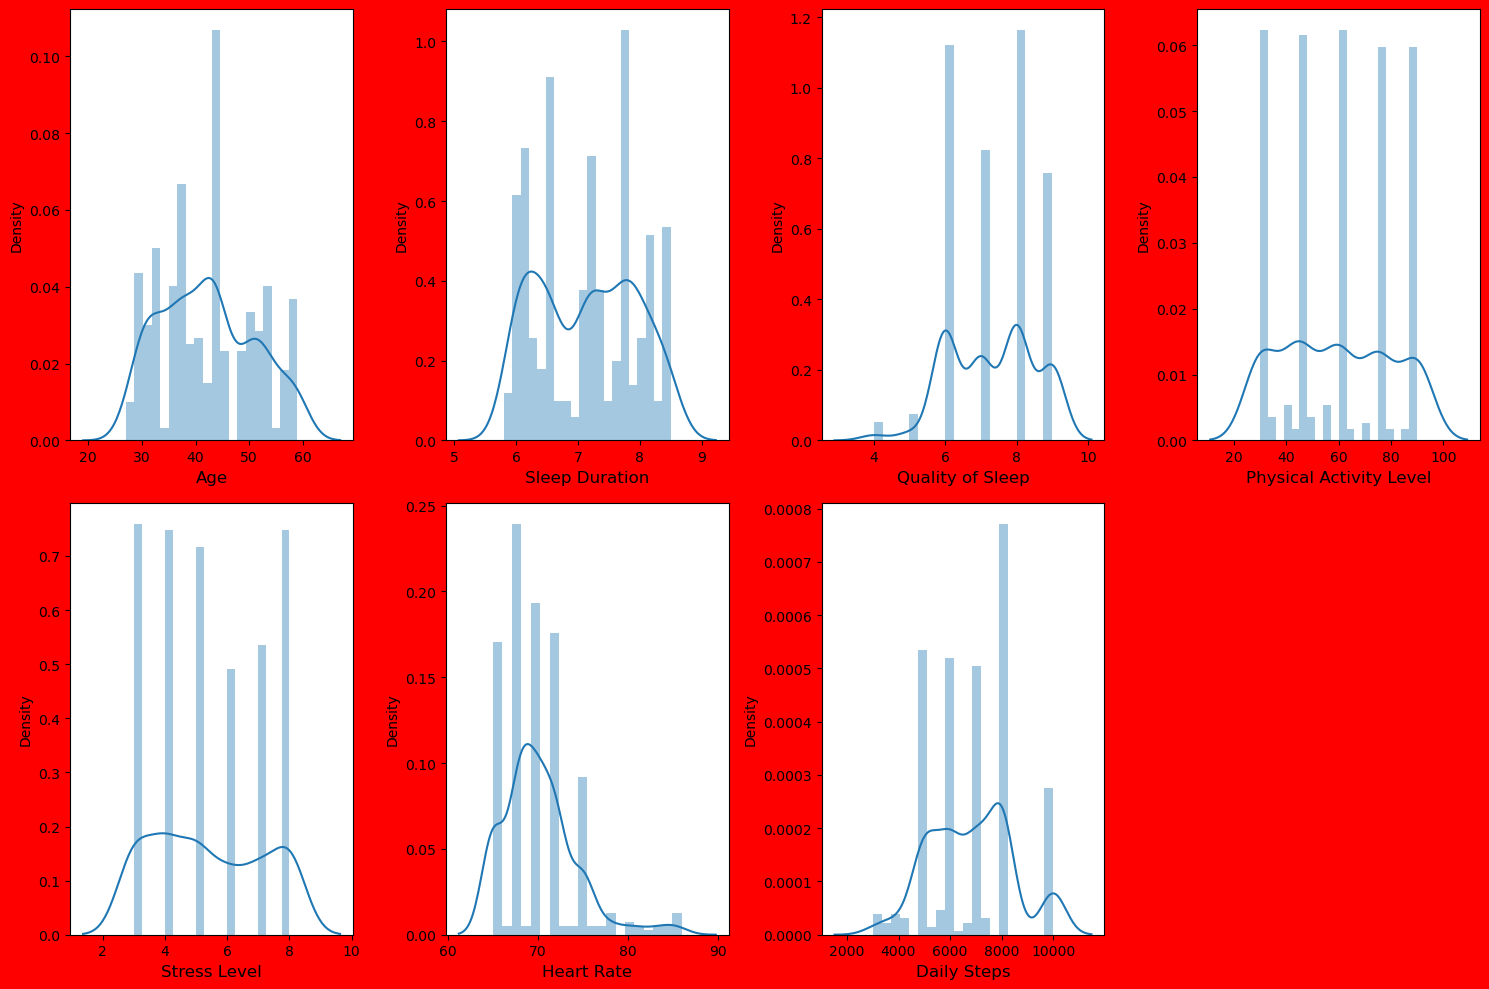

In [26]:
# Check data distribution for skewness (only numeric columns are given for checking skewness)
a = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

plt.figure(figsize=(15, 10), facecolor='red')

plotnumber = 1
for column in a:
    if plotnumber <= 7:
        ax = plt.subplot(2, 4, plotnumber)
        sns.distplot(data[column], bins=20)
        plt.xlabel(column, fontsize=12)
    plotnumber += 1

plt.tight_layout()

Data distribution appears almost symmetrical. Heart rate has slight left skewness indicating that there are more instances of lower heart rates in the dataset.

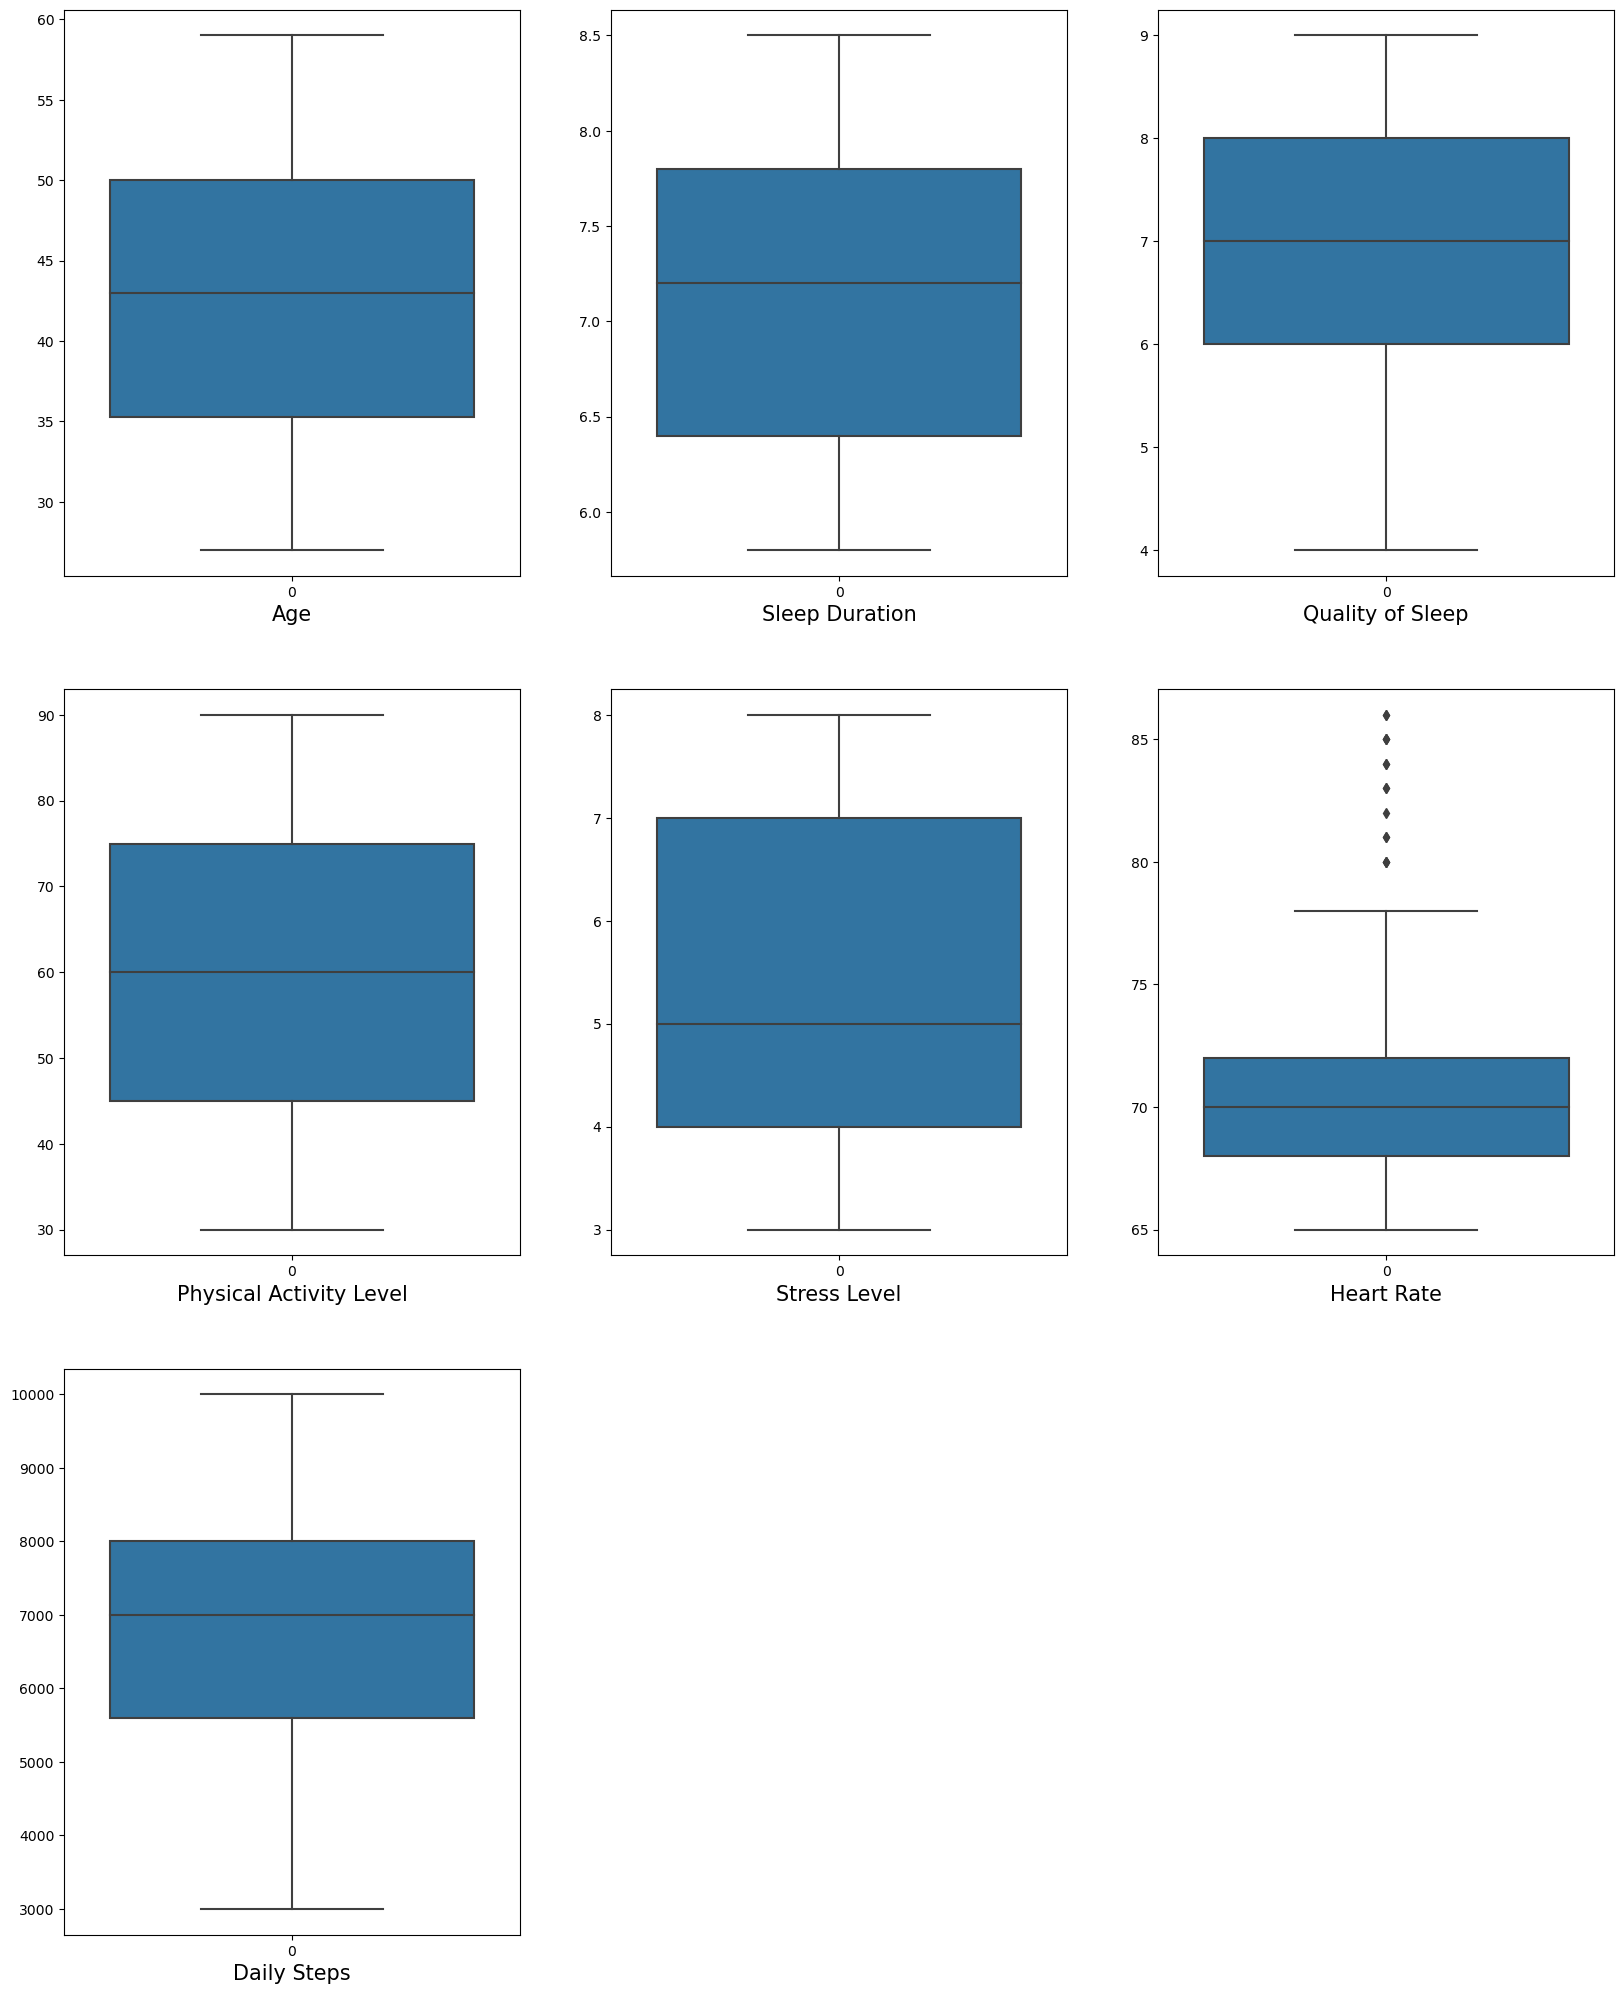

In [27]:
# Check boxplot for outliers
features=data[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']]
plt.figure(figsize=(20,25))
graph=1
for column in features:
    if graph<=7:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=features[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()

There are higher outliers in heart rate

In [28]:
# Detect specific outliers using quantile method to see if the outlier is valid

if 'Heart Rate' in data.columns:
    q1 = data['Heart Rate'].quantile(0.25)
    q3 = data['Heart Rate'].quantile(0.75)

    iqr = q3 - q1

    # Calculate the upper bound for outliers
    high_hr = q3 + 1.5 * iqr

    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}, Upper bound for Heart Rate: {high_hr}")

else:
    print("The 'Heart Rate' column does not exist in the DataFrame.")

Q1: 68.0, Q3: 72.0, IQR: 4.0, Upper bound for Heart Rate: 78.0


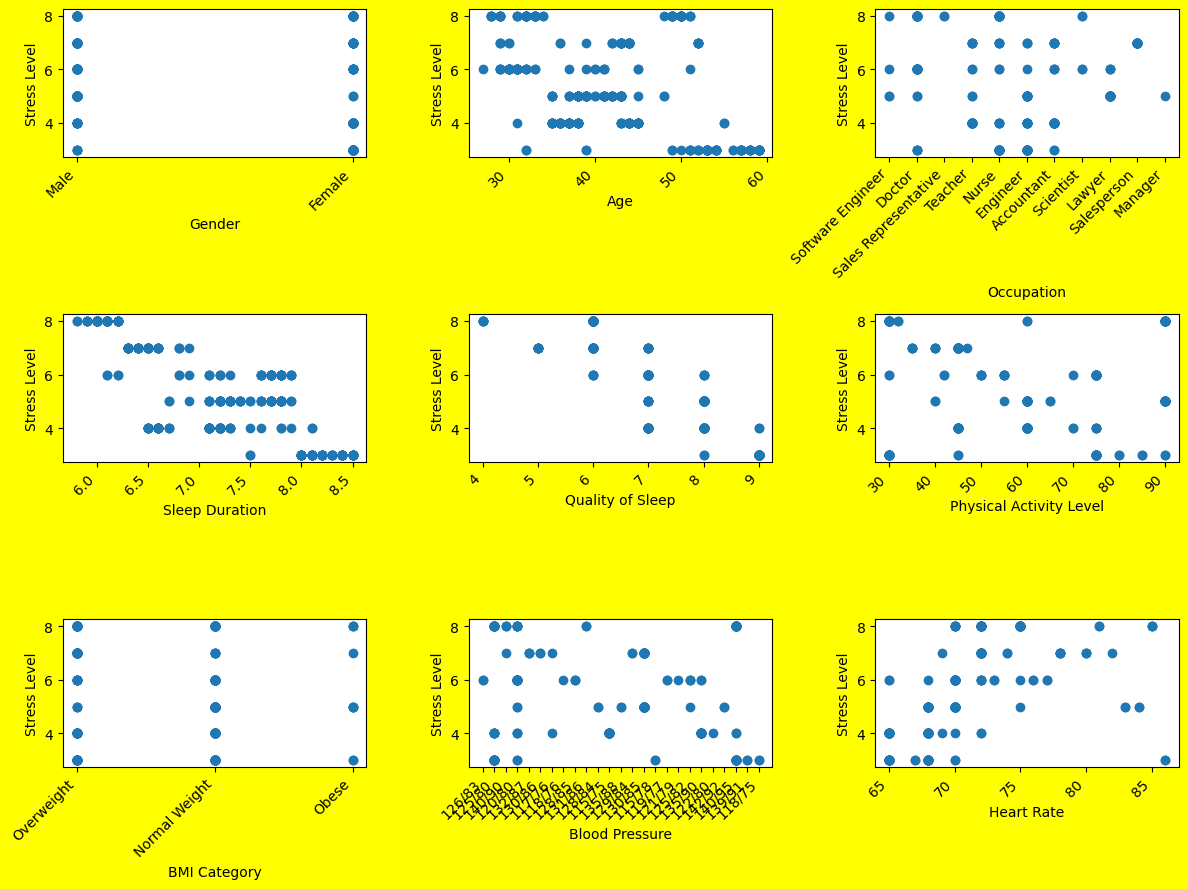

In [29]:
# Observe relationship between all features with respect to label

y = data['Stress Level']
x = data.drop(columns=['Stress Level', 'Person ID'], axis=1)
plt.figure(figsize=(12, 9), facecolor='yellow')

plotnumber = 1
for column in x:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        plt.scatter(x[column], y)
        plt.xlabel(column)
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
        plt.ylabel('Stress Level')
    plotnumber += 1
plt.tight_layout()

1. Stress level is almost the same in both genders
2. Stress level is high in young generation of around 30yrs of age
3. Stress level decreases with increase in sleep duration (linear relationship)
4. Stress level decreases with increase in quality of sleep (linear relationship)
5. Stress level decreases with increase in physical activity (linear relationship)
6. Stress level almost decreases with increase in blood pressure (linear relationship)
7. Stress level increase with increase in heart rate (linear relationship)

<Figure size 1500x800 with 0 Axes>

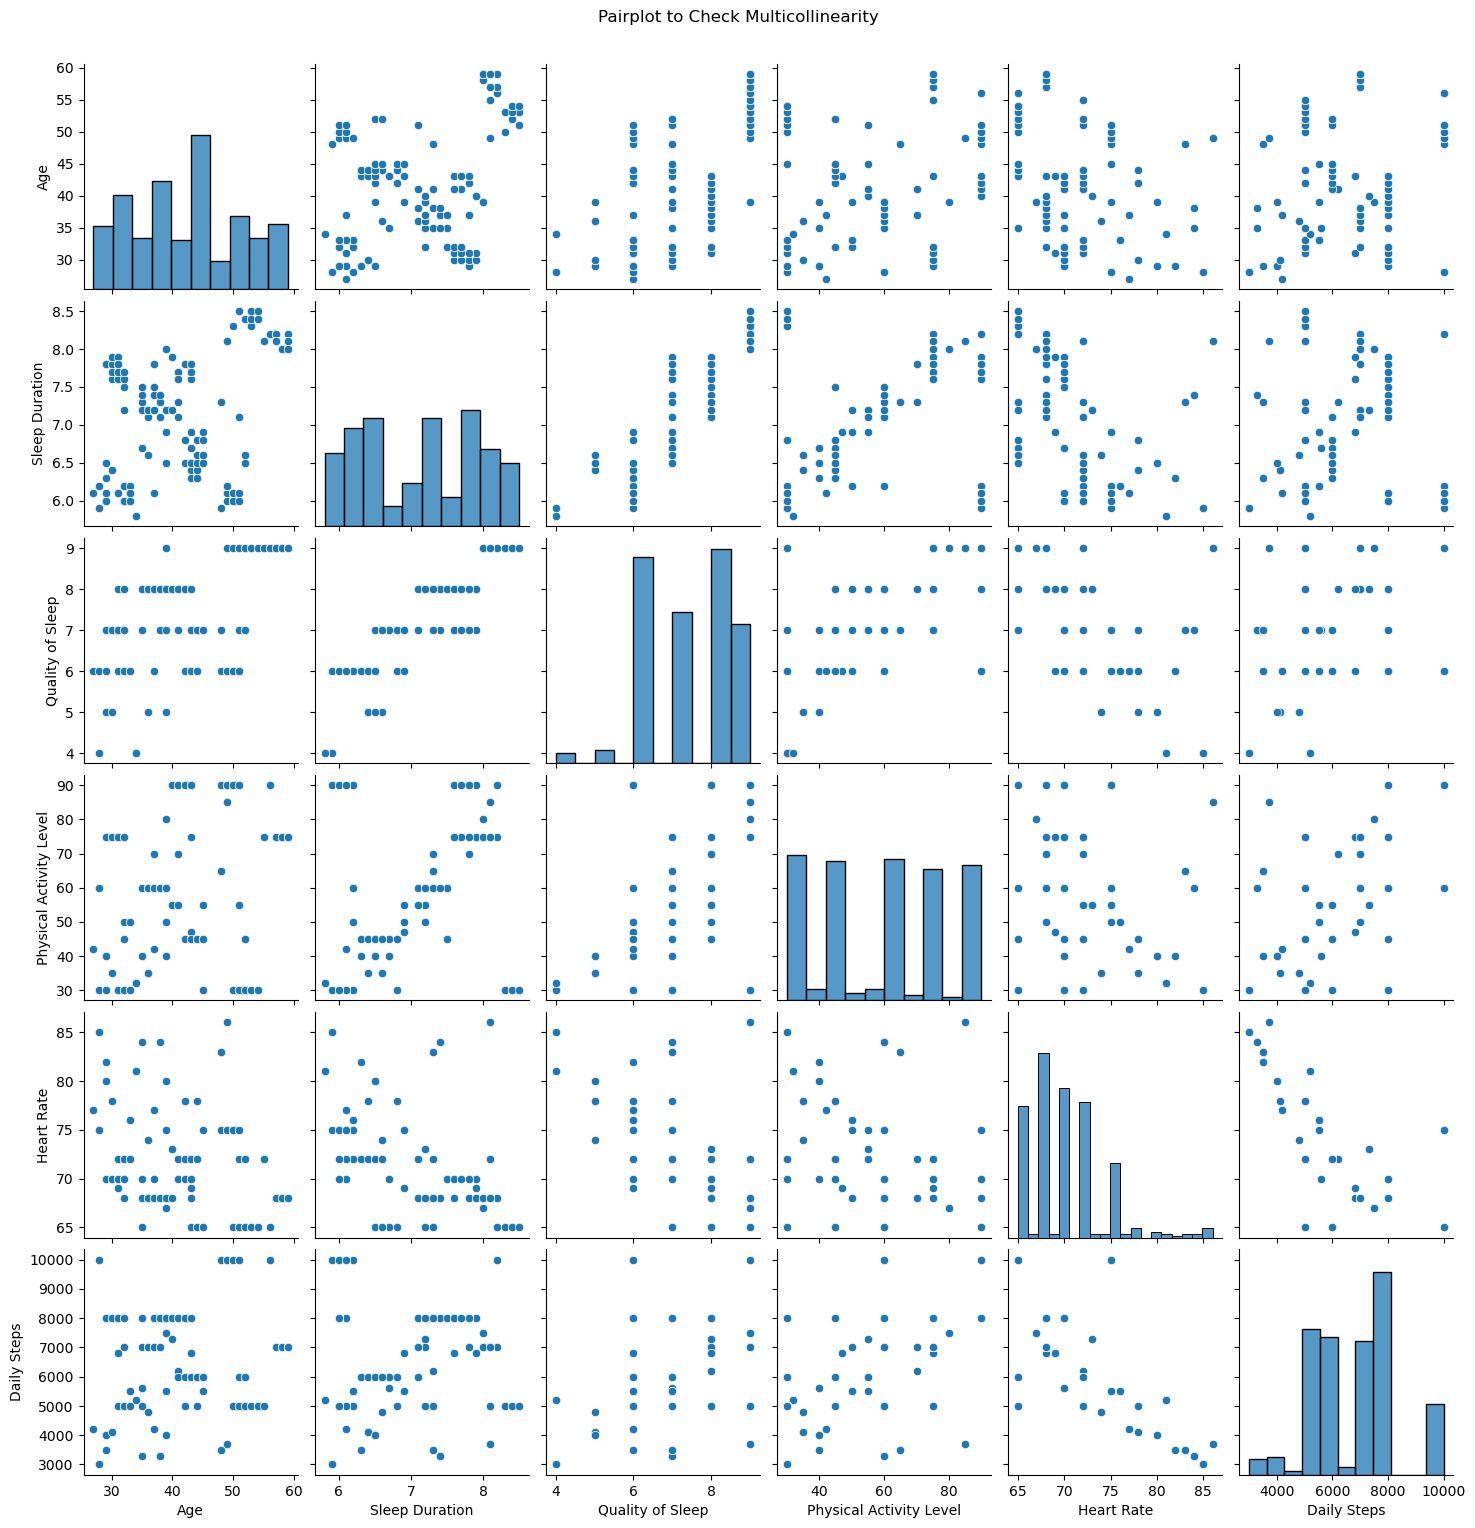

In [30]:
# Check for multicollinearity using pairplot (Find relationship between variables- Qualitative assessment)
x = data.drop(columns=['Stress Level','Person ID'], axis=1)

plt.figure(figsize=(15, 8))
sns.pairplot(x)
plt.suptitle("Pairplot to Check Multicollinearity", y=1.02)
plt.show()

There's linear relationship between quality of sleep and sleep duration.

In [31]:
# Correlation matrix between selected features
cm= data2[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']].corr()

# Display the correlation matrix
cm

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Age,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


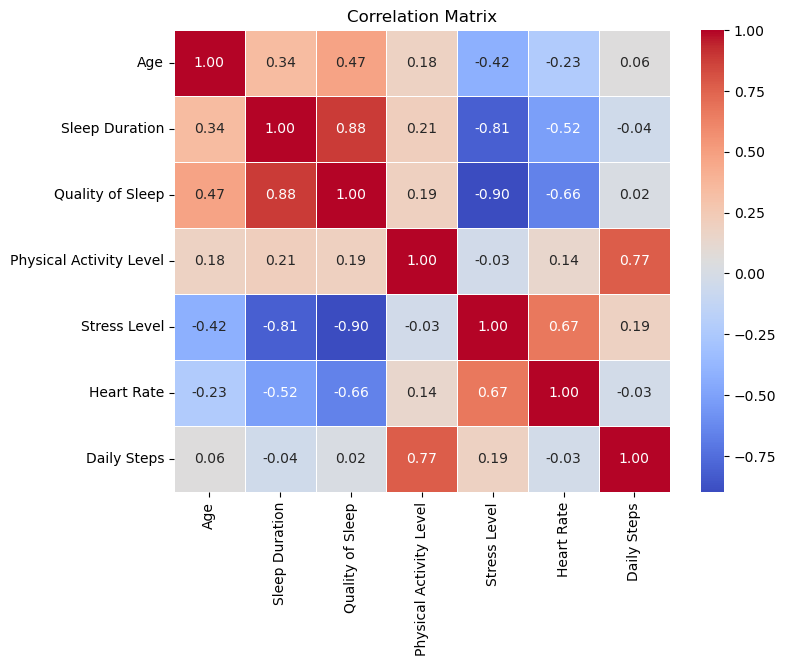

In [32]:
# Visual representation of the correlation matrix, you can use a heatmap with a library like Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

There's high positive correlation between quality of sleep and sleep duration, so either one can be eliminated to avoid 
multicollinearity.

Moreover, Physical Activity Level and Daily Steps are highly positively correlated.
'Sleep Duration', 'Heart Rate', 'Age' have high correlation with our label "Stress level"

In [33]:
# Check for multicollinearity using variance inflation factor (VIF) calculations.
x=data[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif['Features'] = x.columns
vif

,VIF,Features
0,1.385041,Age
1,5.295312,Sleep Duration
2,11.000056,Quality of Sleep
3,5.007188,Physical Activity Level
4,7.952974,Stress Level
5,3.420481,Heart Rate
6,5.069089,Daily Steps


Here vif of quality of sleep is > 10 which can be considered as high, thereby showing high multicollinearity.   
So Quality of Sleep can be dropped and hence remove collinearity between the categorical features .

In [34]:
# Drop 'Quality of Sleep' column
data2.drop(columns='Quality of Sleep',axis=1,inplace=True)
data2.head()

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1,9,2,11,1,27,6.1,42,6,77,4200
1,1,1,0,9,1,28,6.2,60,8,75,10000
2,1,1,0,9,1,28,6.2,60,8,75,10000
3,1,6,1,22,2,28,5.9,30,8,85,3000
4,1,6,1,22,2,28,5.9,30,8,85,3000


# Feature Selection

Since there are quantitative features and categorical features in this dataset, forr feature slection use SelectKBest to 
select the best quantitative features and concatenate with the important categorical features after encoding.  

This concatenated dataset should be used for training and model building

In [35]:
x=data2.drop(columns='Stress Level',axis=1)
print('x \n')
display(x.head())
y=data2['Stress Level']
print('y \n')
display(y.head())

x 



,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps
0,1,9,2,11,1,27,6.1,42,77,4200
1,1,1,0,9,1,28,6.2,60,75,10000
2,1,1,0,9,1,28,6.2,60,75,10000
3,1,6,1,22,2,28,5.9,30,85,3000
4,1,6,1,22,2,28,5.9,30,85,3000


y 



0    6
1    8
2    8
3    8
4    8
Name: Stress Level, dtype: int64

In [36]:
# FEATURE SELECTION of quantitative variables using SelectKBest

best=SelectKBest(score_func=f_classif,k='all') # Use ANOVA to get f1_score of top 15 features
a=best.fit(x,y) # best.fit(x, y): Fits the best object to the data,(x,y); a: Stores the fitted object for further use.

df_columns=pd.DataFrame(x.columns) # Creates a DataFrame containing the feature names.
df_score=pd.DataFrame(a.scores_) # Creates a DataFrame containing the calculated scores for each feature.

combined=pd.concat([df_columns,df_score],axis=1) # Combines the feature names and scores into a single DataFrame - 'combined'

combined.columns=['Feature','Score'] # Assigns meaningful column names to the combined DataFrame.

print(combined.nlargest(7,'Score'))

          Feature       Score
6  Sleep Duration  448.998046
5             Age   85.182799
0          Gender   71.556718
8      Heart Rate   66.856697
4  Sleep Disorder   42.162472
2    BMI Category   25.173574
9     Daily Steps   20.281403


In [37]:
# FEATURE SELECTION of label encoded categorical variables using Chi-square
from sklearn.feature_selection import chi2

In [38]:
chiscore=chi2(x,y)
chiscore

(array([9.11979341e+01, 1.43855551e+02, 1.09533777e+02, 2.95720225e+02,
        5.63018689e+01, 3.56826024e+02, 2.84459498e+01, 5.43876503e+02,
        4.32791662e+01, 3.09425151e+04]),
 array([3.76376876e-018, 2.70955302e-029, 5.14070868e-022, 8.33120352e-062,
        7.04265738e-011, 5.93421400e-075, 2.97743241e-005, 2.68646136e-115,
        3.24360659e-008, 0.00000000e+000]))

In [39]:
chiscore_table = pd.DataFrame({'Feature': x.columns, 'Chi2 Score': chiscore[0]})
# 'Chi2 Score': chiscore[0] creates a dictionary-like object with feature names as keys and their corresponding chi-squared scores as values.
chiscore_table = chiscore_table.sort_values(by='Chi2 Score', ascending=False)

# Display the table of chi-squared values
print(chiscore_table)

                   Feature    Chi2 Score
9              Daily Steps  30942.515117
7  Physical Activity Level    543.876503
5                      Age    356.826024
3           Blood Pressure    295.720225
1               Occupation    143.855551
2             BMI Category    109.533777
0                   Gender     91.197934
4           Sleep Disorder     56.301869
8               Heart Rate     43.279166
6           Sleep Duration     28.445950


chiscore_table.plot.bar(x='Feature', y='Chi2 Score', figsize=(6, 3))
plt.xlabel('Feature')
plt.ylabel('Chi2 Score')
plt.title('Chi2 Score for Features')
plt.show()

Daily steps have higher chi2 score. It correlates with Physical Activity Level. So we can avoid PAL for model building.  

We can select Daily steps, age, blood pressure, and occupation

# MODEL BUILDING AND EVALUATION

In [40]:
X=data2[['Daily Steps','Age','Blood Pressure','Occupation']]
print('X \n')
display(x.head())
Y=data2['Stress Level']
print('Y \n')
display(y.head())

X 



,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,Age,Sleep Duration,Physical Activity Level,Heart Rate,Daily Steps
0,1,9,2,11,1,27,6.1,42,77,4200
1,1,1,0,9,1,28,6.2,60,75,10000
2,1,1,0,9,1,28,6.2,60,75,10000
3,1,6,1,22,2,28,5.9,30,85,3000
4,1,6,1,22,2,28,5.9,30,85,3000


Y 



0    6
1    8
2    8
3    8
4    8
Name: Stress Level, dtype: int64

In [41]:
# Save the dataset for using in other models
data2.to_csv('Processed_Stress_data.csv', index=False)

In [42]:
# Model training and defining metrics function

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

def metrics(model_name, a, b, c, d, train=True):
    if train:
        Y_pred = model_name.predict(X_train)
        print('Accuracy of training = ', accuracy_score(Y_train, Y_pred))
    else:
        Y_pred2 = model_name.predict(X_test)
        print('Accuracy of testing = ', accuracy_score(Y_test, Y_pred2))
        print('Classification report= ', classification_report(Y_test, Y_pred2, digits=2))

In [43]:
print('Train', X_train.shape, Y_train.shape)
print('Test', X_test.shape, Y_test.shape)

Train (280, 4) (280,)
Test (94, 4) (94,)


In [44]:
# Check imbalance by counting labels
from collections import Counter
Counter(data['Stress Level'])

Counter({3: 71, 8: 70, 4: 70, 5: 67, 7: 50, 6: 46})

No imbalance detected

# Let's try Logistic regression model

In [45]:
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train, Y_train)

LogisticRegression(multi_class='multinomial')

In [46]:
# y is predicted wrt x_test
y_pred=lr.predict(X_test)
y_pred

array([8, 5, 3, 4, 6, 6, 4, 4, 5, 6, 3, 5, 5, 4, 8, 8, 4, 7, 8, 6, 6, 8,
       3, 6, 6, 8, 6, 3, 7, 4, 8, 7, 8, 8, 7, 8, 8, 3, 3, 3, 7, 3, 7, 6,
       5, 4, 3, 3, 7, 3, 4, 8, 5, 7, 4, 8, 8, 4, 6, 8, 4, 3, 3, 4, 8, 7,
       4, 8, 4, 3, 8, 5, 8, 8, 8, 4, 4, 8, 4, 3, 6, 7, 8, 8, 4, 6, 6, 8,
       4, 4, 6, 8, 8, 8], dtype=int64)

In [47]:
# Call the function and pass the dataset to check scores
metrics(lr,X_train,Y_train,X_test,Y_test,train=True) # Training score
metrics(lr,X_train,Y_train,X_test,Y_test,train=False) # Testing score

Accuracy of training =  0.5035714285714286
Accuracy of testing =  0.4574468085106383
Classification report=                precision    recall  f1-score   support

           3       0.60      0.90      0.72        10
           4       0.50      0.50      0.50        20
           5       0.71      0.22      0.33        23
           6       0.57      0.80      0.67        10
           7       0.00      0.00      0.00        10
           8       0.39      0.52      0.45        21

    accuracy                           0.46        94
   macro avg       0.46      0.49      0.44        94
weighted avg       0.49      0.46      0.44        94



In [48]:
# Cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,Y,cv=5).mean()

0.42472072072072076

Model might be overfitting as cv score is less

In [49]:
# Hyperparameter tuning
# To improve accuracy by GridSearchCV 

from sklearn.model_selection import GridSearchCV
# Define the parameter grid for logistic regression
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

# Instantiate GridSearchCV
gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model on training data
gs.fit(X_train, Y_train)

# Print the best score and best parameters
print("Best Score:", gs.best_score_)
print("Best Parameters:", gs.best_params_)


Best Score: 0.5464285714285714
Best Parameters: {'C': 0.1, 'penalty': 'l2'}


In [50]:
lr1 = LogisticRegression(C=0.1, penalty='l2')
lr1.fit(X_train, Y_train)

LogisticRegression(C=0.1)

In [51]:
# Call the function and pass the dataset to check scores
metrics(lr1,X_train,Y_train,X_test,Y_test,train=True) # Training score
metrics(lr1,X_train,Y_train,X_test,Y_test,train=False) # Testing score

Accuracy of training =  0.5035714285714286
Accuracy of testing =  0.4574468085106383
Classification report=                precision    recall  f1-score   support

           3       0.60      0.90      0.72        10
           4       0.50      0.50      0.50        20
           5       0.71      0.22      0.33        23
           6       0.57      0.80      0.67        10
           7       0.00      0.00      0.00        10
           8       0.39      0.52      0.45        21

    accuracy                           0.46        94
   macro avg       0.46      0.49      0.44        94
weighted avg       0.49      0.46      0.44        94



A training accuracy of 50.36% suggests that the model is able to classify approximately half of the instances correctly on the data it was trained on. A testing accuracy of 45.74% suggests that the model is able to generalize its predictions to unseen data with an accuracy of approximately 45.74%.

In summary, while the model performs slightly better on the training dataset compared to the testing dataset, the overall accuracy is relatively low for both, indicating that there may be room for improvement in the model's performance.

In [52]:
# Cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(lr1,X,Y,cv=5).mean()

0.4380540540540541

The model looks overfitting, so we can try other models.

In [53]:
# Save lr model
import pickle

with open('Stress_logreg', 'wb') as file:
    pickle.dump(lr1, file)

# KNN model

In [54]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [55]:
# Call the function and pass the dataset to check scores
metrics(knn,X_train,Y_train,X_test,Y_test,train=True) # Training score
metrics(knn,X_train,Y_train,X_test,Y_test,train=False) # Testing score

Accuracy of training =  0.9
Accuracy of testing =  0.8829787234042553
Classification report=                precision    recall  f1-score   support

           3       0.82      0.90      0.86        10
           4       0.86      0.95      0.90        20
           5       0.88      0.96      0.92        23
           6       0.70      0.70      0.70        10
           7       1.00      0.90      0.95        10
           8       1.00      0.81      0.89        21

    accuracy                           0.88        94
   macro avg       0.88      0.87      0.87        94
weighted avg       0.89      0.88      0.88        94



In [56]:
# Cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,Y,cv=5).mean()

0.8394954954954954

Got 83.9%, therefore not overfitting

In [57]:
# Hyperparameter tuning

# To improve accuracy by GridSearchCV or RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for k-Nearest Neighbors
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting scheme for neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev']  # Distance metric
}

# Instantiate GridSearchCV
gs = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the model on training data
gs.fit(X_train, Y_train)

# Print the best score and best parameters
print("Best Score:", gs.best_score_)
print("Best Parameters:", gs.best_params_)

Best Score: 0.9285714285714285
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}


Use the above parameters in the knn algorithm and check accuracy. Accuracy may/maynot improve after hyperparameter tuning.

In [58]:
knn1 = KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')
knn1.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [59]:
# Call the function and pass the dataset to check scores
metrics(knn1,X_train,Y_train,X_test,Y_test,train=True) # Training score
metrics(knn1,X_train,Y_train,X_test,Y_test,train=False) # Testing score

Accuracy of training =  0.9821428571428571
Accuracy of testing =  0.9680851063829787
Classification report=                precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        20
           5       1.00      1.00      1.00        23
           6       1.00      0.80      0.89        10
           7       1.00      0.90      0.95        10
           8       0.95      1.00      0.98        21

    accuracy                           0.97        94
   macro avg       0.98      0.95      0.96        94
weighted avg       0.97      0.97      0.97        94



In [60]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(knn1,X,Y,cv=5).mean()

0.852864864864865

Model has good cv score, therefore no overfitting.

In [61]:
# Save knn model
import pickle

with open('Stress_knn.pkl', 'wb') as file:
    pickle.dump(knn1, file)

# Decision tree model

In [62]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train) 

DecisionTreeClassifier()

In [63]:
# Call the function and pass the dataset to check scores
metrics(dt,X_train,Y_train,X_test,Y_test,train=True) # Training score
metrics(dt,X_train,Y_train,X_test,Y_test,train=False) # Testing score

Accuracy of training =  0.9821428571428571
Accuracy of testing =  0.9042553191489362
Classification report=                precision    recall  f1-score   support

           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        20
           5       1.00      1.00      1.00        23
           6       0.58      0.70      0.64        10
           7       1.00      0.90      0.95        10
           8       0.82      0.86      0.84        21

    accuracy                           0.90        94
   macro avg       0.90      0.89      0.89        94
weighted avg       0.92      0.90      0.91        94



These scores suggest that the model performs very well on the training data, achieving nearly perfect accuracy. 
However, there is a slight drop in performance on the testing data, indicating that the model may be overfitting to the training
data. Overall, achieving a testing accuracy of 90% is quite good, but it's essential to consider other metrics and perform 
further evaluation to ensure the robustness of your model.

In [64]:
Y_pred=dt.predict(X_test)

In [65]:
cm= confusion_matrix
cm(Y_test,Y_pred)
pd.DataFrame(cm(Y_test,Y_pred), columns=[3,4,5,6,7,8], index=[3,4,5,6,7,8])

,3,4,5,6,7,8
3,10,0,0,0,0,0
4,0,18,0,1,0,1
5,0,0,23,0,0,0
6,0,0,0,7,0,3
7,0,0,0,1,9,0
8,0,0,0,3,0,18


In [66]:
# Hyperparameter tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10, 15),
    'min_samples_leaf': range(2, 6),
    'max_leaf_nodes': range(5, 15)
}

# Instantiate DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Instantiate GridSearchCV
gs = GridSearchCV(estimator=dt, param_grid=grid_param, cv=5, n_jobs=-1)

# Fit the model
gs.fit(X_train, Y_train)

# Get the best parameters
best_params = gs.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 14,
 'min_samples_leaf': 2}

In [67]:
# Now train and score with the above parameters
dt1 = DecisionTreeClassifier(criterion='gini',
                             max_depth=10,
                             max_leaf_nodes=14,
                             min_samples_leaf=3)
dt1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=14, min_samples_leaf=3)

In [68]:
# Call the function and pass the dataset to check scores
metrics(dt1,X_train,Y_train,X_test,Y_test,train=True) # Training score
metrics(dt1,X_train,Y_train,X_test,Y_test,train=False) # Testing score

Accuracy of training =  0.925
Accuracy of testing =  0.8723404255319149
Classification report=                precision    recall  f1-score   support

           3       0.69      0.90      0.78        10
           4       0.95      0.90      0.92        20
           5       1.00      0.96      0.98        23
           6       0.86      0.60      0.71        10
           7       0.90      0.90      0.90        10
           8       0.78      0.86      0.82        21

    accuracy                           0.87        94
   macro avg       0.86      0.85      0.85        94
weighted avg       0.88      0.87      0.87        94



In [69]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(dt,X,Y,cv=5).mean()

0.7938378378378379

Model seems not to overfit as it has cv score of 79.3%.

In [70]:
# Save DecisionTree model
import pickle

with open('Stress_dt', 'wb') as file:
    pickle.dump(dt1, file)

# FINDING BEST MODEL

By finding roc_auc score, we can find the best model if the dataset has binary labels: higher the score, better the model.


But our dataset has multiclass labels, so we could use other metrics such as accuracy for finding which is the best model.

We have 3 models here for Stress detection: logistic regression, knn and decision tree

USE ACCURACY SCORE FOR FINDING OUT THE BEST MODEL!

In [71]:
print('*' * 50)
print( 'For decision tree model: \n')
metrics(dt1,X_train,Y_train,X_test,Y_test,train=True) 
metrics(dt1,X_train,Y_train,X_test,Y_test,train=False)
print('*' * 50)

print( 'For knn model: \n')
metrics(knn1,X_train,Y_train,X_test,Y_test,train=True) 
metrics(knn1,X_train,Y_train,X_test,Y_test,train=False)
print('*' * 50)

print( 'For logistic regression model: \n')
metrics(lr1,X_train,Y_train,X_test,Y_test,train=True) 
metrics(lr1,X_train,Y_train,X_test,Y_test,train=False)
print('*' * 50)

**************************************************
For decision tree model: 

Accuracy of training =  0.925
Accuracy of testing =  0.8723404255319149
Classification report=                precision    recall  f1-score   support

           3       0.69      0.90      0.78        10
           4       0.95      0.90      0.92        20
           5       1.00      0.96      0.98        23
           6       0.86      0.60      0.71        10
           7       0.90      0.90      0.90        10
           8       0.78      0.86      0.82        21

    accuracy                           0.87        94
   macro avg       0.86      0.85      0.85        94
weighted avg       0.88      0.87      0.87        94

**************************************************
For knn model: 

Accuracy of training =  0.9821428571428571
Accuracy of testing =  0.9680851063829787
Classification report=                precision    recall  f1-score   support

           3       1.00      1.00      1.00        

# Based on accuracy, knn model is the best among three for Stress level prediction.